In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_base_path = os.path.join("..", "data", "TrainingData")
subject_x_template = "subject_{}_{}__x.csv"
subject_x_time_template = "subject_{}_{}__x_time.csv"
subject_y_template = "subject_{}_{}__y.csv"
subject_y_time_template = "subject_{}_{}__y_time.csv"

In [3]:
x_header = ["acc_x", "acc_y", "acc_z", "gyro_x", "gyro_y", "gyro_z"]
def load_and_join_data(patient_id, session_number):
    x_path = os.path.join(data_base_path, subject_x_template.format(patient_id, session_number))
    x_time_path = os.path.join(data_base_path, subject_x_time_template.format(patient_id, session_number))
    y_path = os.path.join(data_base_path, subject_y_template.format(patient_id, session_number))
    y_time_path = os.path.join(data_base_path, subject_y_time_template.format(patient_id, session_number))
    
    x = pd.read_csv(x_path, names=x_header)
    x_time = pd.read_csv(x_time_path, names=["time"])
    
    y = pd.read_csv(y_path, names=["label"])
    y_time = pd.read_csv(y_time_path, names=["time"])
    
    return pd.concat([x_time, x], axis=1), pd.concat([y_time, y], axis=1)

In [4]:
patient_id = "001"
session_number = "01"
x, y = load_and_join_data(patient_id, session_number)

In [5]:
x.head()

,time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,0.000,4.435275,8.196063,2.974488,0.014215,-0.039157,-0.016744
1,0.025,4.186920,8.344455,2.908057,0.005771,-0.004480,-0.003345
2,0.050,4.544637,8.408659,2.890000,0.007967,0.022412,0.001159
3,0.075,4.849308,8.411614,2.900692,0.027778,-0.010670,-0.014223
4,0.100,4.509190,8.118649,2.847298,0.021577,-0.045498,-0.021111


In [6]:
y.head()

,time,label
0,0.02,0
1,0.12,0
2,0.22,0
3,0.32,0
4,0.42,0


In [7]:
min_time = min(x["time"].min(), y["time"].min())
max_time = max(x["time"].max(), y["time"].max())

In [8]:
min_time, max_time

(0.0, 947.225)

In [9]:
new_df = x.merge(y, on="time", how="outer").sort_values(by="time").reset_index(drop=True, inplace=False)

In [10]:
new_df.shape

(47363, 8)

In [11]:
def plot(df, target_class=None, acc_vis=["x", "y", "z"], gyro_vis=["x", "y", "z"], window=1000):
    acc = ["acc_x", "acc_y", "acc_z"]
    gyro = ["gyro_x", "gyro_y", "gyro_z"]
    colors = {"x": "r", "y": "g", "z":"b"}
    
    acc_axis_vis = [f"acc_{axis}" for axis in acc_vis]
    acc_colors = [colors[axis] for axis in acc_vis]
    gyro_axis_vis = [f"gyro_{axis}" for axis in gyro_vis]
    gyro_colors = [colors[axis] for axis in gyro_vis]
    
    y = df["label"].to_numpy()
    mask = np.isnan(y)
    y[mask] = -1
    if target_class is not None:
        indices = np.where(y == target_class)[0]
        start = max(0, indices[0] - window)
        end = min(indices[0]+window, len(y))
    else:
        start, end = 0, len(y)
    
    f = plt.figure(dpi=150)
    plt.subplot(311)
    for col, color in zip(acc_axis_vis, acc_colors):
        plt.plot(df[col][start:end], c=color)
    plt.subplot(312)
    for col, color in zip(gyro_axis_vis, gyro_colors):
        plt.plot(df[col][start:end], c=color)
    plt.subplot(313)
    plt.plot(y[start:end])
    plt.show()

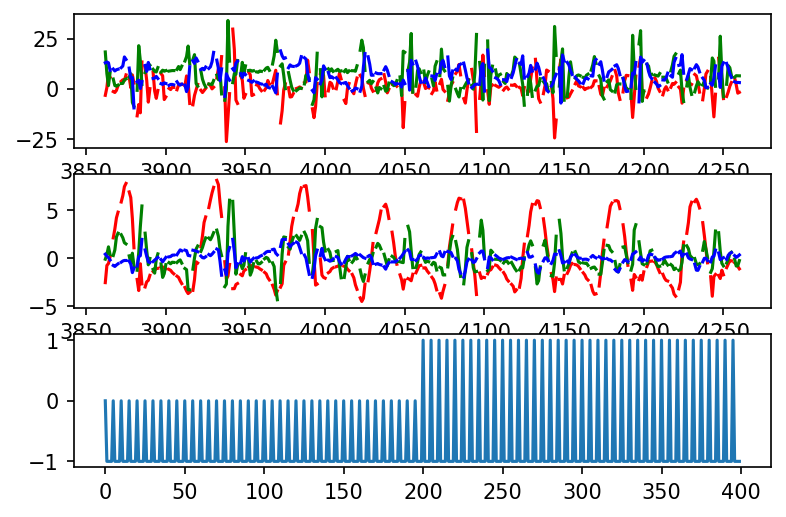

In [12]:
plot(new_df, target_class=1, acc_vis=["x", "y", "z"], window=200)

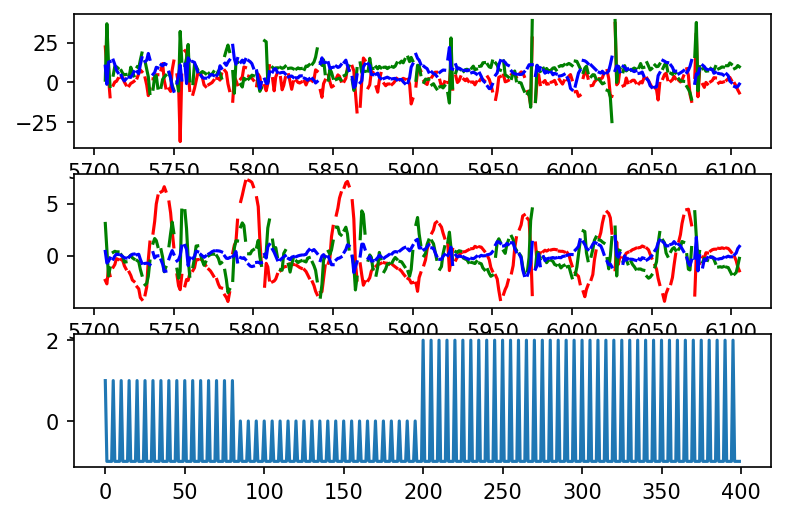

In [13]:
plot(new_df, target_class=2, acc_vis=["x", "y", "z"], window=200)